# Import and preprocces data
To run this file you can press on 'Cell' and then on 'Run Cells'. You'll be asked multiple times to give input, this way you'll be able use the data in multiple ways. If you have more data in the future, you can add them in the same directory as the one with the Automonous Greenhouse Challenge teams. You can add new data by making a new directory. This directory needs to contain five csv files: Greenhouse_climate.csv, CropManagement.csv, Irrigation.csv, Production.csv and vip.csv. To run this specific code it's usefull to have the same features as the ones of the greenhouse challenge (see their ReedMe.pdf).

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize as minimize
import os

In [214]:
FileNotFound = True
while FileNotFound:
    try:
#         directory = input("""Please add the directory you're data is in. 
#         If you're using our original provided files this should be 'data'\n""") #TODO uncomment dit
        directory = 'data' #TODO comment dit
        datasets = [filename for filename in os.listdir(directory)]
        FileNotFound = False
    except FileNotFoundError:
        print("Please add a valid directory")
        FileNotFound = True



In [215]:
data = {}
for dataset in datasets:
    GHClim = pd.read_csv(f"data/{dataset}/Greenhouse_climate.csv") 
    Crop = pd.read_csv(f"data/{dataset}/CropManagement.csv") 
    irri = pd.read_csv(f"data/{dataset}/Irrigation.csv") 
    prod = pd.read_csv(f"data/{dataset}/Production.csv") 
    vip = pd.read_csv(f"data/{dataset}/vip.csv") 
    GHClim = GHClim.drop(['VentLee', 'Ventwind', 'AssimLight', 'BlackScr', 'EnScr'], axis=1)
    
    GHClim.fillna(method='ffill', inplace=True)
    Crop.fillna(method='ffill', inplace=True)
    irri.fillna(method='ffill', inplace=True)
    prod.fillna(method='ffill', inplace=True)
    vip.fillna(method='ffill', inplace=True)
    
    # If the first column is/columns are NaN
    GHClim.fillna(method='bfill', inplace=True)
    Crop.fillna(method='bfill', inplace=True)
    irri.fillna(method='bfill', inplace=True)
    prod.fillna(method='bfill', inplace=True)
    vip.fillna(method='bfill', inplace=True)
    data[dataset] = {'GHClim':GHClim, 'Crop':Crop, 'irri':irri, 'prod':prod, 'vip':vip}

In [216]:
def visualize_time(datasets, feature, feature_name, ylabel, csv_file='GHClim', time='GHtime'):
    # With 33133 timestamps of 5 minutes
    plt.title(f'{feature_name} with 33133 timestamps of 5 minutes for every dataset'.capitalize())
    for dataset in datasets:
        x, y = data[dataset][csv_file][time], data[dataset][csv_file][feature]
        plot = plt.plot(x, y, '.', label=dataset)
        plt.plot()
    plt.xlabel('Timestamp every 5 minutes')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

    # Trendlines of all the 33133 datapoints
    plt.title(f'Trendlines of {feature_name.lower()} of all the 33133 datapoints')
    for dataset in datasets:
        x, y = data[dataset][csv_file][time], data[dataset][csv_file][feature]
        a,b = np.polyfit(list(x),list(y),1)
        x_trend = np.linspace(min(x), max(x), 2)
        plt.plot(x_trend, x_trend*a+b, label=dataset)
    plt.xlabel('Timestamp every 5 minutes')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

    # Every week sample
    plt.title(f'{feature_name} sample every week for every dataset, with trendlines'.capitalize() )
    for dataset in datasets:
        x, y = np.arange(16), data[dataset][csv_file][feature][::2016][1:]
        a,b = np.polyfit(list(x),list(y),1)
        x_trend = np.linspace(min(x), max(x), 2)
        plot = plt.plot(x, y, '.', label=dataset)
        plt.plot(x_trend, x_trend*a+b,color=plot[0].get_color())
    plt.xlabel('Week')
    plt.ylabel(ylabel)
#     plt.legend()
    plt.show()

    # Every week average
    plt.title(f'{feature_name} average every week for every dataset, with trendlines'.capitalize())
    for dataset in datasets:
        weekly_HumDef = []
        for i in range(len(data[dataset][csv_file][time])//2016):
            weekly_HumDef.append(data[dataset][csv_file][feature][i*2016:i*2016+2016].mean())
        x, y = np.arange(16), weekly_HumDef
        a,b = np.polyfit(list(x),list(y),1)
        x_trend = np.linspace(min(x), max(x), 2)
        plot = plt.plot(x, y, '.', label=dataset)
        plt.plot(x_trend, x_trend*a+b,color=plot[0].get_color())
        plt.plot()
    plt.xlabel('Week')
    plt.ylabel(ylabel)
#     plt.legend()
    plt.show()
    

# Feature information is retrieved from the ReadMe.pdf from the Automonous greenhouse challenge
features_ghclim = {'Tair': ['Air temperature greenhouse', '°C'],
'RHair': ['Relative humidity greenhouse', '%'],
'CO2air': ['CO2 greenhouse', 'ppm'],
'HumDef': ['Humidity deficit', 'g/m3'],
'PipeLow': ['Lower circuit Temperature', '°C'],
'PipeGrow': ['Growth circuit Temperature', '°C']}

# Data visualization
Lets show how the features change with time.

First of all a demonstration of the visualization of a single team. Since a lot of datapoint are the same for the teams, it's not always clear if there's only one datapoint measured or multiple. If you look closer, the points where multiple datapoints are measured are bigger points. This is not that userfriendly, which is why the regression line is added (which of course takes all datapoints into account).

Please type Yes or No (case sensitive)
Is the Croperators dataset still part of your datasets?.
            [Yes/No]Yes


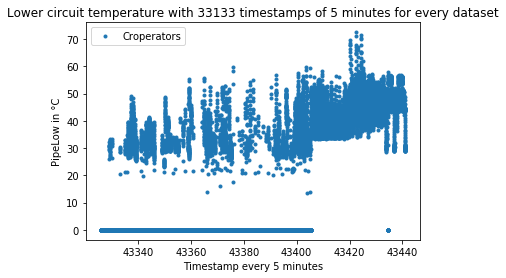

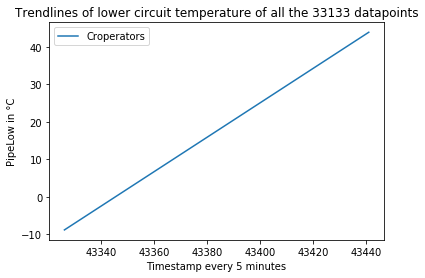

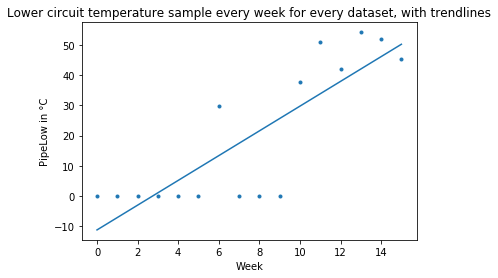

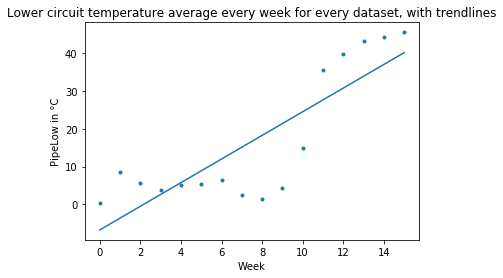

In [217]:
key = 'PipeLow'
run = 'Maybe'
while run != 'Yes' and run != 'No':
    print('Please type Yes or No (case sensitive)')    
    run = str(input('''Is the Croperators dataset still part of your datasets?.
            [Yes/No]'''))
if run == 'Yes':
    visualize_time(['Croperators'], key, features_ghclim[key][0], f'{key} in {features_ghclim[key][1]}')
else:
    while run != 'Yes':
        try:
            dataset = input('Which dataset would you like to show?\n')
            visualize_time([dataset], key, features_ghclim[key][0], f'{key} in {features_ghclim[key][1]}')
            run = 'Yes'
        except KeyError:
            print('Please chose a valid dataset (case sensitive)')

## Greenhouse climate

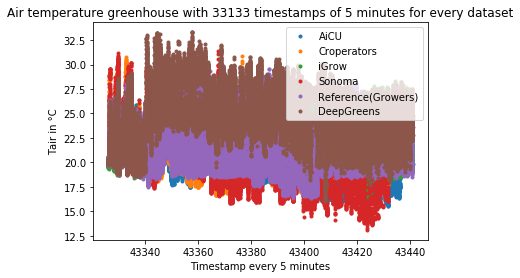

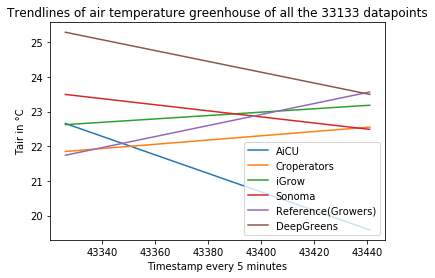

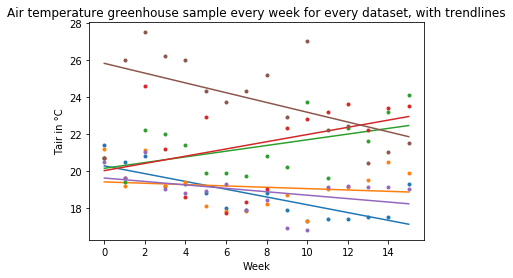

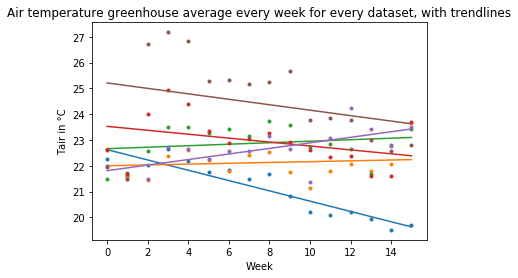

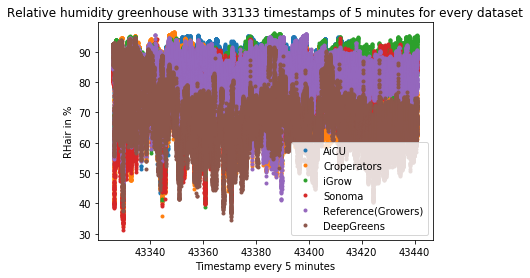

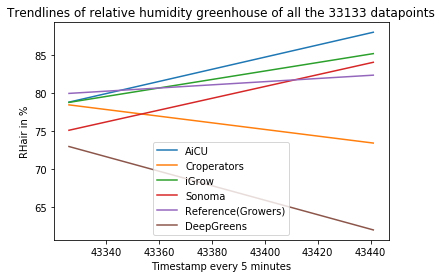

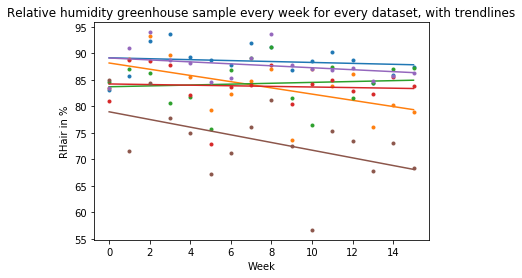

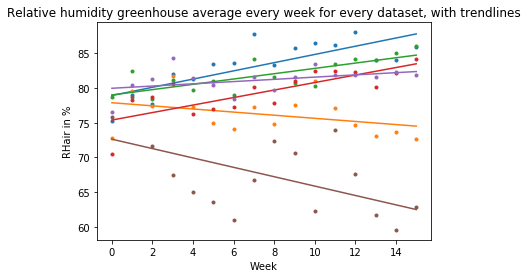

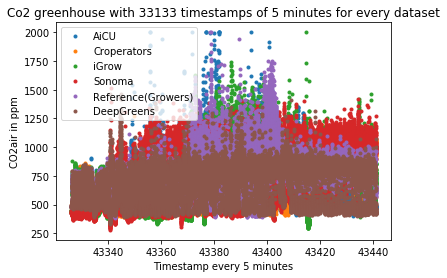

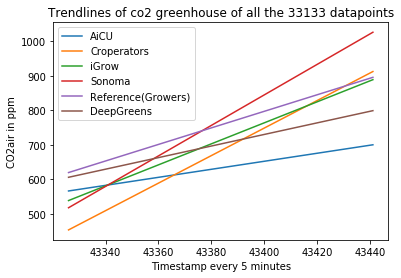

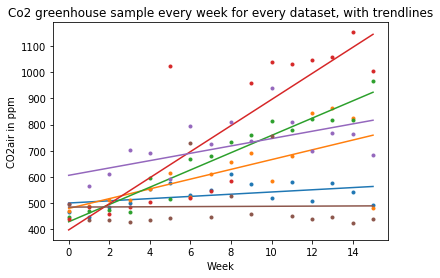

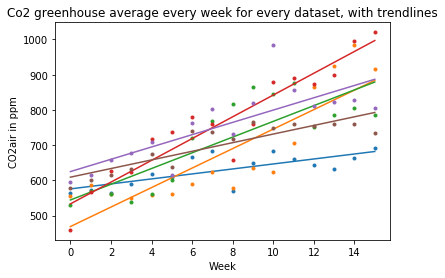

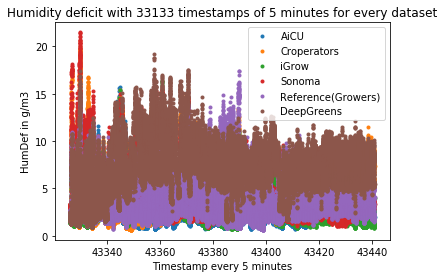

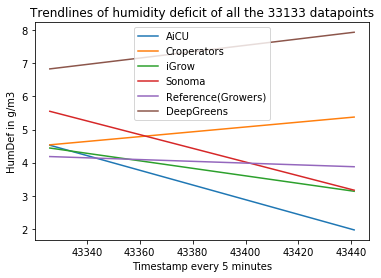

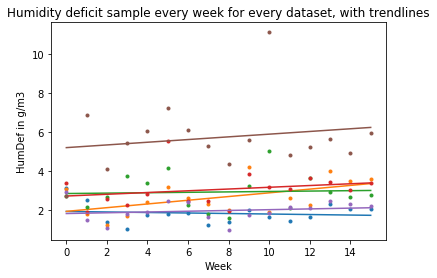

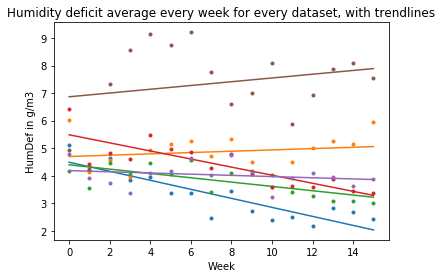

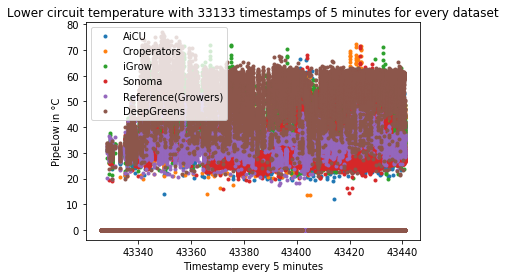

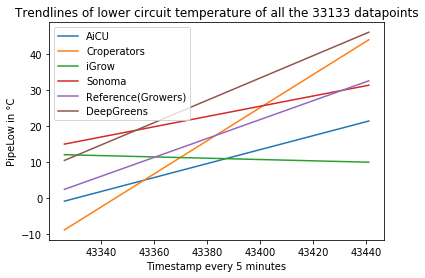

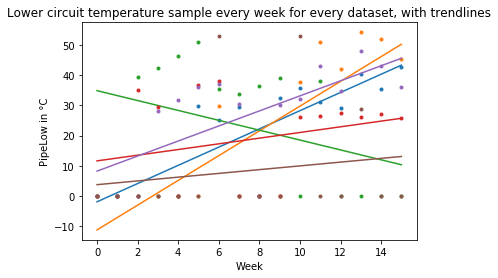

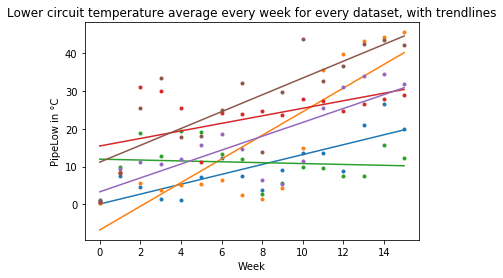

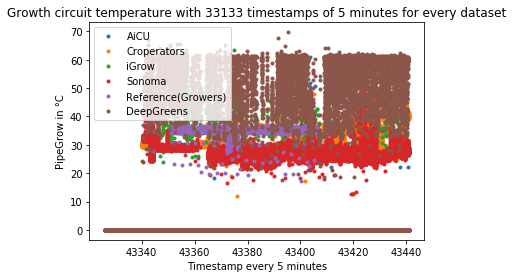

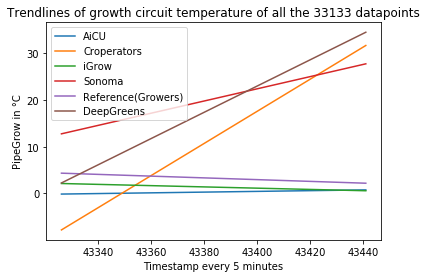

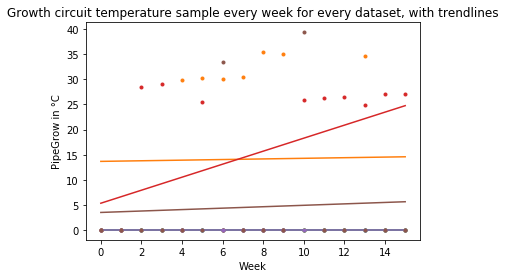

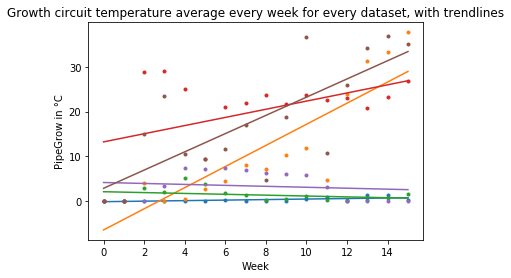

In [218]:
for key in features_ghclim:
    visualize_time(datasets, key, features_ghclim[key][0], f'{key} in {features_ghclim[key][1]}')

## Production

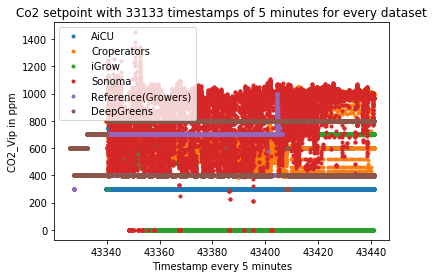

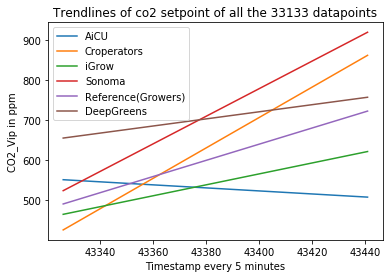

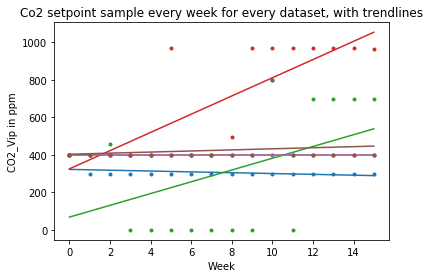

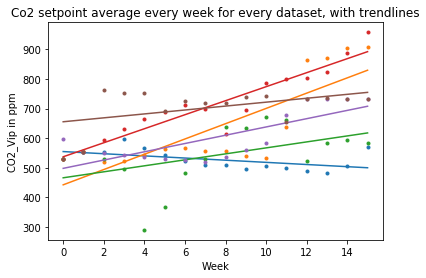

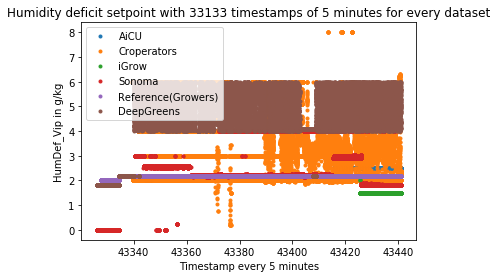

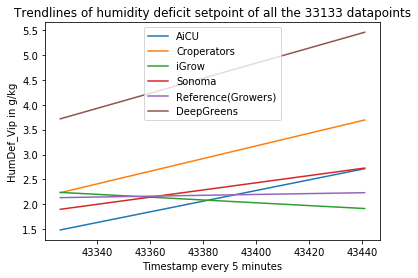

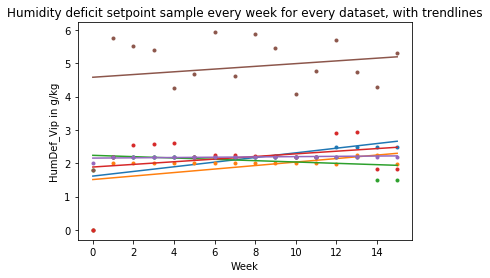

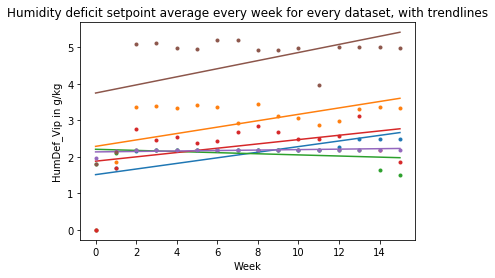

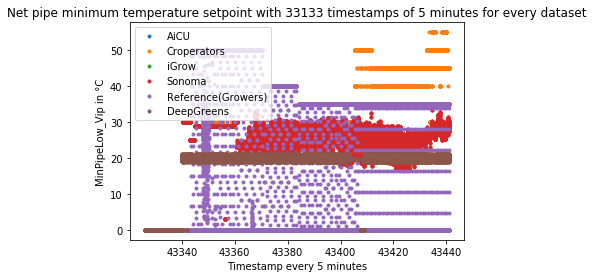

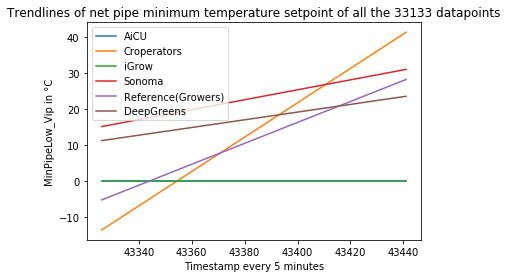

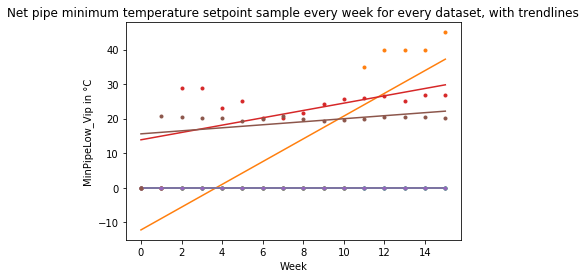

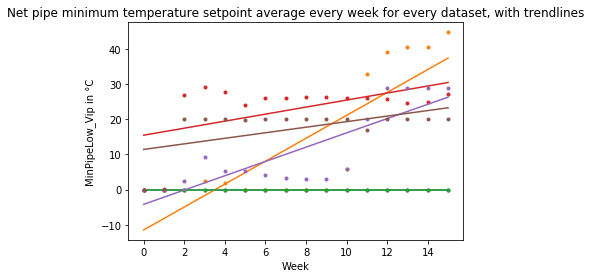

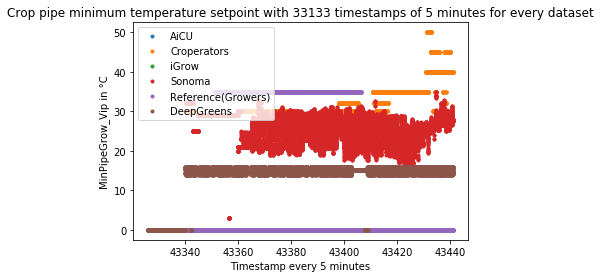

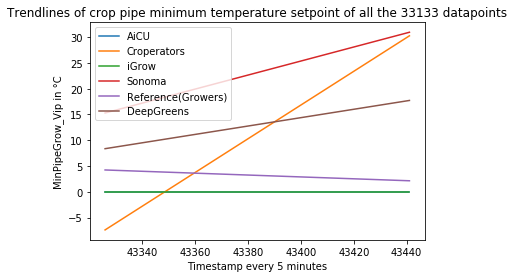

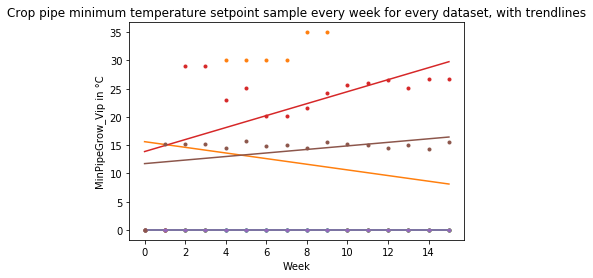

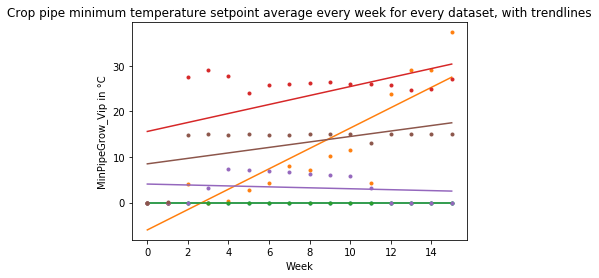

In [219]:
features_vip = {'CO2_Vip': ['CO2 setpoint', 'ppm'],
'HumDef_Vip': ['humidity deficit setpoint', 'g/kg'],
'MinPipeLow_Vip': ['net pipe minimum temperature setpoint', '°C'],
'MinPipeGrow_Vip': ['crop pipe minimum temperature setpoint', '°C']}

for key in features_vip:
    visualize_time(datasets, key, features_vip[key][0], f'{key} in {features_vip[key][1]}', 'vip', 'time')

# Weekly average

Like mentioned the GHtime is the timestamp per 5 minutes. Every time it changes with +- 0.0034722, this is $\frac{1}{1440}$ of a day: 5 minutes. So the GHtime is in days. One week is 7 days, so if we would like to take the average of every week, we would need to take the average of time the GHtime, changed by 7. 1 week is 10080 minutes. So 1 week is $\frac{10080}{5}$ timestamps, is 2016 timestamps.

In [220]:
run = 'Maybe'
while run != 'Yes' and run != 'No':
    print('Please type Yes or No (case sensitive)')    
    run = str(input('''
            Would you like to divide the data in weekly data? 
            If you choose No, the average of the features per dataset
            will be calculated.\n[Yes/No]'''))

if run == 'Yes':
    # Create a dictionary with weekly data to create more usuable data
    weekly_data_per_team = dict()
    for dataset in datasets:
        # Add important features from greenhouse climate dataset
        weekly_CO2, weekly_HumDef = [], []
        for i in range(len(data[dataset]['GHClim']['GHtime'])//2016):
            weekly_HumDef.append(data[dataset]['GHClim']['HumDef'][i*2016:i*2016+2016].mean())
            weekly_CO2.append(data[dataset]['GHClim']['CO2air'][i*2016:i*2016+2016].mean())

        # Add weekly production value (fruit number multiplied by price) 
        weekly_prodA, weekly_prodB = [], []
        # Timestamp is per day 
        for i in range(len(data[dataset]['prod']['time'])//7):
            weekly_prodA.append(np.mean(data[dataset]['prod']['ProdA_num'][i*7:i*7+7]))
            weekly_prodB.append(np.mean(data[dataset]['prod']['ProdB_num'][i*7:i*7+7]))
        weekly_data_per_team[f'{dataset}'] = {'CO2air':weekly_CO2, 'HumDef':weekly_HumDef, 
                                'prodA':weekly_prodA, 'prodB':weekly_prodB}
    print("""The code is succesfully runned and the weekly data 
          devided by team is now in the variable 'weekly_data_per_team'""")

Please type Yes or No (case sensitive)

            Would you like to divide the data in weekly data? 
            If you choose No, the average of the features per dataset
            will be calculated.
[Yes/No]No


In [221]:
if run == 'Yes':
    # Create a dictionary with weekly data to create more usuable data
    weekly_CO2, weekly_HumDef = [], []
    weekly_prodA, weekly_prodB = [], []
    for team in datasets:
        # Add important features from greenhouse climate dataset
        # The first few week is not that productive. So if we devide 
        # the data in weeks it's usefull not to take the first week into account.
        for i in range(1,len(data[team]['GHClim']['GHtime'])//2016):
            weekly_HumDef.append(data[team]['GHClim']['HumDef'][i*2016:i*2016+2016].mean())
            weekly_CO2.append(data[team]['GHClim']['CO2air'][i*2016:i*2016+2016].mean())
        # Add weekly production sum (both A and B)
        # Timestamp is per day 
        for i in range(1,len(data[team]['prod']['time'])//7):
            weekly_prodA.append(np.mean(data[team]['prod']['ProdA_num'][i*7:i*7+7]))
            weekly_prodB.append(np.mean(data[team]['prod']['ProdB_num'][i*7:i*7+7]))
    weekly_data_total = {'CO2':weekly_CO2, 'HumDef':weekly_HumDef, 
                  'prodA':weekly_prodA, 'prodB':weekly_prodB}
    print("""The code is succesfully runned and the weekly data not
          devided by team is now in the variable 'weekly_data_total'""")

# Polynomial fitting
## On weekly data

Which degree of polynomial fitting would you like?
[2-8]2


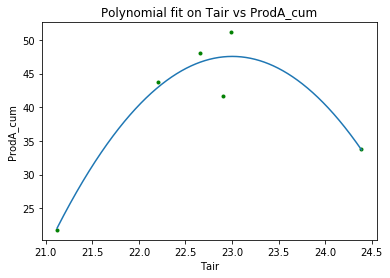

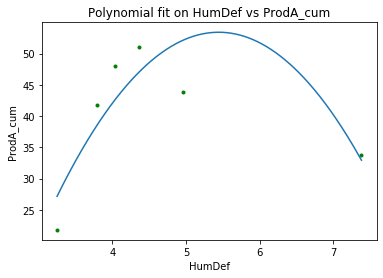

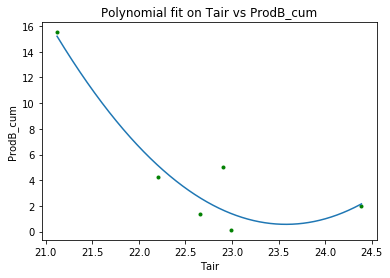

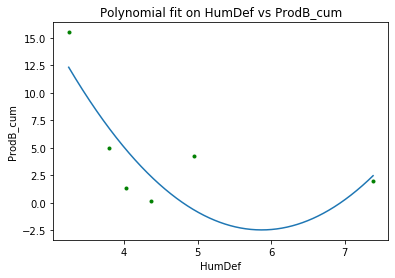

In [223]:
def polynome(params, linspace):
    if len(params)==3:
        a,b,c = params
        return [a*x**2+b*x+c for x in linspace]
    if len(params)==4:
        a,b,c,d = params
        return [a*x**3+b*x**2+c*x+d for x in linspace]
    if len(params)==5:
        a,b,c,d,e = params
        return [a*x**4+b*x**3+c*x**2+d*x+e for x in linspace]
    if len(params)==6:
        a,b,c,d,e,f = params
        return [a*x**5+b*x**4+c*x**3+d*x**2+e*x+f for x in linspace]
    if len(params)==7:
        a,b,c,d,e,f,g = params
        return [a*x**6+b*x**5+c*x**4+d*x**3+e*x**2+f*x+g for x in linspace]
    if len(params)==8:
        a,b,c,d,e,f,g,h = params
        return [a*x**7+b*x**6+c*x**5+d*x**4+e*x**3+f*x**2+g*x+h for x in linspace]
    if len(params)==9:
        a,b,c,d,e,f,g,h,i = params
        return [a*x**8+b*x**7+c*x**6+d*x**5+e*x**4+f*x**3+g*x**2+h*x+i for x in linspace]

def plot_polynome(x,y, degree, x_name, y_name):
    plt.plot(x, y, '.g')
    params = np.polyfit(x,y, degree)
    plt.plot(np.linspace(min(x),max(x),1000), polynome(params, np.linspace(min(x),max(x),1000)))
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(f'Polynomial fit on {x_name} vs {y_name}')
    plt.show()

# Ask for input
degree = 0
while not 2<=degree<=8:
    try:
        degree = int(input('Which degree of polynomial fitting would you like?\n[2-8]'))
        if not 2<=degree<=8:
            print('Please chose an integer between 2 and 8.')
    except ValueError:
        print('Please chose an integer between 2 and 8.')
if run == 'Yes':
    for y_name in ['prodA', 'prodB']:
        for x_name in ['CO2', 'HumDef']:
            x, y = weekly_data_total[x_name], weekly_data_total[y_name]
            plot_polynome(x,y, degree, x_name, y_name)
else:
     # Take the average of the features and the eventual production value of every team
    plot_data = dict()
    for category in ['ProdA_cum', 'ProdB_cum']:
        tair, hum_def, prod = [], [], []
        for dataset in datasets:
            prod_df = data[dataset]['prod'][category]
            tair.append(data[dataset]['GHClim']['Tair'].mean())
            hum_def.append(data[dataset]['GHClim']['HumDef'].mean())
            prod.append(prod_df[prod_df.index[-1]])
#             plt.plot(hum_def, prod, '.', label=f'{team}:HumDef')   
        x, y = tair, prod
        plot_polynome(x,y, degree, 'Tair', category)
        x, y = hum_def, prod
        plot_polynome(x,y, degree, 'HumDef', category)

As you can see in the following figure, according to Zheng et al. (2018) the optimal CO growth for three perennial grass species is around 900 ppm. If you fit an 3rd degree polynomial on the automonous greenhouse challenge data you will get a simulair result (see figure 2)
![](https://media.springernature.com/full/springer-static/image/art%3A10.1186%2Fs12870-018-1243-3/MediaObjects/12870_2018_1243_Fig1_HTML.gif?as=webp)
Figure 1: Zheng, Y., Li, F., Hao, L., Shedayi, A. A., Guo, L., Ma, C., ... & Xu, M. (2018). The optimal CO 2 concentrations for the growth of three perennial grass species. BMC plant biology, 18(1), 27.
![](https://i.imgur.com/CDDojpD.png)
Figure 2: Automonous greenhouse challenge data